## SIR model
Theoretical analysis based on estimated parameters

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

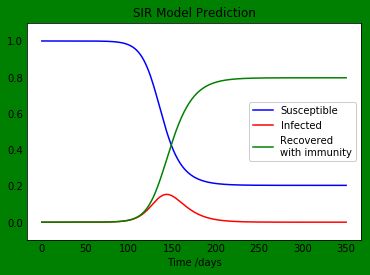

In [6]:
# Khartoum population szie, P.
P = 1974647

# Recovery rate, gamma, (in 1/days) and contact rate, beta.
Gamma , Beta  = 1/10 , 0.2

# I_0 is the number of infected individuals, R_0 the number of recovered individuals 
#and S_0, is susceptible individuals.
I_0, R_0 = 1, 0
S_0 = P - I_0 - R_0

# Time intrval (in days)
time = np.linspace(0, 350, 350)

# The SIR model
def SIR(y, time, P, Gamma, Beta):
    S, I, R = y
    dsdt = -Beta * S * I / P
    didt = Beta * S * I / P - Gamma * I
    drdt = Gamma * I
    return(dsdt,didt,drdt)

# Initial conditions vector
y0 = S_0, I_0, R_0
# Integrate the SIR equations over the time grid, time
ret = odeint(SIR, y0, time, args=(P, Gamma,Beta))
S, I, R = ret.T

# Plot S(t), I(t) and R(t) data
fig = plt.figure(facecolor='g')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S/P, 'b', alpha=1, label='Susceptible')
ax.plot(time, I/P, 'r', alpha=1, label='Infected')
ax.plot(time, R/P, 'g', alpha=1, label='Recovered \nwith immunity')
plt.title("SIR Model Prediction")
ax.set_xlabel('Time /days')
#ax.set_ylabel('')
ax.set_ylim(-0.1,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(1)
plt.show()

# About SIR model

$SIR$ model is a simple mathematical model to descripe the spread of a disease in a population. In this model we divide the population of $P$ individuals into three categories, susceptible $S$, infectious $I$ and recovered $R$.  We deal with these categories as functions of time $t$. The differential equations which describes this model were first derived by Kermack and McKendrick,

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{P},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{P} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

Where,

$S(t)$ are those susceptible but not yet infected with the disease;
$I(t)$ is the number of infectious individuals;
$R(t)$ are those individuals who have recovered and now they have immunity to the desease.

The $SIR$ model describes the change in the population with time using two parameters, $\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease. $\gamma$ is the recovery rate.

Here is a prediction of the spread of the coronavirus using the Khartoum "capital of Sudan" population. We used hypothetical values for $\beta$ and $\gamma$.
